## Chapter 9 - Miscellaneous Exercises

### TryIt 9.1 - Lag (Non-Ideal) Compensator
Use the following Python and Python Control Systems library to reproduce Figure 9.13.

Figure 9.13 is from Example 9.2 which explains how to design a lag-compensator.

The plant in question is

$$
G_{p} = \frac{K}{(s+1)(s+2)(s+10)}
$$

where $K = 164.6$. The lag-compensator is

$$
G_{c} = \frac{s+0.111}{s+0.01}
$$

Text(0.5, 1.0, 'Uncompensated Vs Lag-Compensated Step Response')

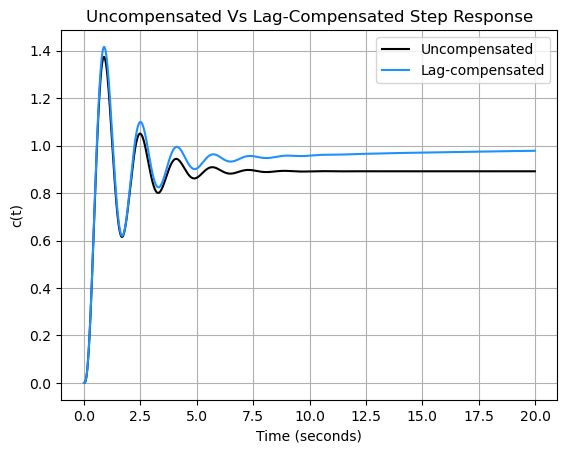

In [30]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Create transfer function with zeros, poles, and gain
Gu = ct.zpk([],[-1,-2,-10],164.6)   # Create plant transfer function
Gc = ct.zpk([-0.111],[-0.01],1)     # Create lag compensator transfer function
Gce = Gu*Gc                         # Cascade the systems by multiplying

# Place open-loop transfer functions into a negative feedback loop
Tu = ct.feedback(Gu,1)              # Place uncompensated system in a unity feedback loop
Tc = ct.feedback(Gce,1)             # Place compensated system in a unity feedback loop

# Compute step responses for uncompensated and compensated systems
# For time series below, time in plot appears to be 20 sec. Sample time was chosen arbitrarily
t = np.arange(0, 20, 0.010) # Generate 20 second time series with 10ms sample time
Tu_resp = ct.step_response(Tu, t)
Tc_resp = ct.step_response(Tc, t)

# Plot uncompensated vs compensated step responses
y1 = Tu_resp.outputs['y[0]']
y2 = Tc_resp.outputs['y[0]']
plt.plot(t,y1,'k',t,y2,'dodgerblue')
plt.grid(True)
plt.legend(['Uncompensated', 'Lag-compensated'])
plt.ylabel('c(t)')
plt.xlabel('Time (seconds)')
plt.title('Uncompensated Vs Lag-Compensated Step Response')